## Clean data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("RawData.csv")
df

,ID,List ID,Posted Time,Status,Transaction Type,Seller Name,Seller ID,Region (Code),Region Name,Category,...,First Image Link,Image List,Number of Images,Thumbnail Image,Map Image,Ward Name,Property Features,Additional Features,Land Type (Text),Width (Text)
0,154269561,113584228,31/01/2025,accepted,s,Khang anh,24585559,3,Đà Nẵng,1040,...,https://cdn.chotot.com/39I61g4Z4HaQKXOJo4_MW1S...,https://cdn.chotot.com/39I61g4Z4HaQKXOJo4_MW1S...,8,https://cdn.chotot.com/Trr4BbH7JLZnH-Ur7w7o7H4...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Minh,2; 4,NaN,Đất nông nghiệp,Ngang 4 m
1,164081534,122031985,07/02/2025,accepted,s,Minh trí,12588075,3,Đà Nẵng,1040,...,https://cdn.chotot.com/Hsr-tGM2Rr24qj1WWtoGLDO...,https://cdn.chotot.com/Hsr-tGM2Rr24qj1WWtoGLDO...,5,https://cdn.chotot.com/SoG8KUcnMwYDUADSsfYLQ_e...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Khánh Nam,3,NaN,Đất nông nghiệp,Ngang 5 m
2,156854814,115807159,31/01/2025,accepted,s,Khang anh,24585559,3,Đà Nẵng,1040,...,https://cdn.chotot.com/9Ig90eUQZTlpbohXsaHacff...,https://cdn.chotot.com/9Ig90eUQZTlpbohXsaHacff...,8,https://cdn.chotot.com/XVe5iWlj4zqkUpk39SURzI3...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Khánh Nam,2; 3; 4,NaN,Đất nông nghiệp,Ngang 10 m
3,163242245,121308677,31/01/2025,accepted,s,Khang anh,24585559,3,Đà Nẵng,1040,...,https://cdn.chotot.com/YB5LYLM1jC3Ioy_54Zeg9wE...,https://cdn.chotot.com/YB5LYLM1jC3Ioy_54Zeg9wE...,10,https://cdn.chotot.com/1ENRKLeyLCaq8xxE5h0ZB7H...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Phát,4; 2; 3,NaN,Đất nông nghiệp,Ngang 5 m
4,162985943,121088552,01/02/2025,accepted,s,Khang anh,4483578,3,Đà Nẵng,1040,...,https://cdn.chotot.com/wWdkqHNA151A5o-Lo7s6D5l...,https://cdn.chotot.com/wWdkqHNA151A5o-Lo7s6D5l...,6,https://cdn.chotot.com/3rOmXj8yeL8XL-iQf8MzbCp...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Khánh Bắc,4; 2,NaN,Đất nông nghiệp,Ngang 5 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,164466967,122364766,09/02/2025,accepted,s,THANH,3209786,3,Đà Nẵng,1040,...,https://cdn.chotot.com/hpFl3Ca5eHmexvCQ3zo4tzW...,https://cdn.chotot.com/hpFl3Ca5eHmexvCQ3zo4tzW...,4,https://cdn.chotot.com/IncQ-tHxyWA3KpJ416ak0IO...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Thọ Đông,1; 6,NaN,Đất thổ cư,Ngang 15 m
4389,164232001,122161653,10/02/2025,accepted,s,Minh Thành,911228,3,Đà Nẵng,1040,...,https://cdn.chotot.com/cQFFar0EVisJl9sRWN_u9uK...,https://cdn.chotot.com/cQFFar0EVisJl9sRWN_u9uK...,3,https://cdn.chotot.com/rKHoIvzjz8VYwg0jxBrw9zz...,https://cdn.chotot.com/admincentre/location/16...,Phường Khuê Trung,1,NaN,Đất thổ cư,Ngang 10 m
4390,164376325,122286041,09/02/2025,accepted,s,DNRE,308756,3,Đà Nẵng,1040,...,https://cdn.chotot.com/7kUJHPHOHLUmLw8H1pxU5_3...,https://cdn.chotot.com/7kUJHPHOHLUmLw8H1pxU5_3...,5,https://cdn.chotot.com/MBpn-Z99--bBgu2pCwkQE6v...,https://cdn.chotot.com/admincentre/location/16...,Phường Phước Mỹ,NaN,NaN,Đất thổ cư,Ngang 10 m
4391,164180248,122132643,11/02/2025,accepted,s,Hiền Lê,1223952,3,Đà Nẵng,1040,...,https://cdn.chotot.com/FwQILcrJl_2rLQhzxvCU8fm...,https://cdn.chotot.com/FwQILcrJl_2rLQhzxvCU8fm...,2,https://cdn.chotot.com/34Hd8gIpLbuNFLtyKKcGv4s...,https://cdn.chotot.com/admincentre/location/16...,Phường Khuê Mỹ,NaN,NaN,Đất thổ cư,NaN


In [3]:
df = pd.read_csv("RawData.csv")

df = df[
    [
        # "Ward Name", "Street Name", 
        "Longitude", "Latitude",
        "Area (m²)", "Width (m)", "Length (m)", "Land Type", 
        "Legal Status", "House Direction", "Property Features", "Price"
    ]
]

df_initial = df.copy()
df

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price
0,108.169500,16.065700,100.0,4.0,25.0000,4,6,5.0,2; 4,150000000
1,108.158270,16.053888,102.0,5.0,23.0000,4,6,8.0,3,165000000
2,108.150700,16.058900,150.0,10.0,15.0000,4,6,6.0,2; 3; 4,250000000
3,108.172516,16.028736,100.0,5.0,20.0000,4,5,6.0,4; 2; 3,250000000
4,108.136940,16.077059,100.0,5.0,20.0000,4,5,4.0,4; 2,250000000
...,...,...,...,...,...,...,...,...,...,...
4388,108.191900,16.000677,300.0,15.0,20.0000,1,1,6.0,1; 6,16900000000
4389,108.212360,16.026106,243.0,10.0,24.2999,1,1,3.0,1,18500000000
4390,108.244675,16.080378,180.0,10.0,18.0000,1,1,4.0,NaN,27000000000
4391,108.246100,16.031725,443.0,NaN,NaN,1,1,NaN,NaN,32000000000


### Handling missing data

#### Lost data statistics

In [4]:
print(df.isnull().sum())

Longitude               0
Latitude                0
Area (m²)               0
Width (m)             754
Length (m)           1279
Land Type               0
Legal Status            0
House Direction      1555
Property Features    1350
Price                   0
dtype: int64


#### For the Width (m) and Length (m) variables

*After the statistics we know that the area data is complete, then check if there is width but no length or vice versa, then use the area calculation formula. If both features are empty, the default is 5 for width and 5 for length*

In [5]:
# If Length (m) is empty but Width (m) exists, then calculate Length (m)
df.loc[df["Length (m)"].isna() & df["Width (m)"].notna(), "Length (m)"] = (
df["Area (m²)"] / df["Width (m)"]
)

# If Width (m) is empty but Length (m) exists, then calculate Width (m)
df.loc[df["Width (m)"].isna() & df["Length (m)"].notna(), "Width (m)"] = (
df["Area (m²)"] / df["Length (m)"]
)

# If both Width (m) and Length (m) are empty, set Width (m) = 5 and calculate Length (m)
missing_indexes = df[df["Width (m)"].isna() & df["Length (m)"].isna()].index
df.loc[missing_indexes, "Length (m)"] = df.loc[missing_indexes, "Area (m²)"] / 5
df.loc[missing_indexes, "Width (m)"] = 5

*It is clear to see the big change in data distribution, but for land data, I think the above approach is reasonable.*

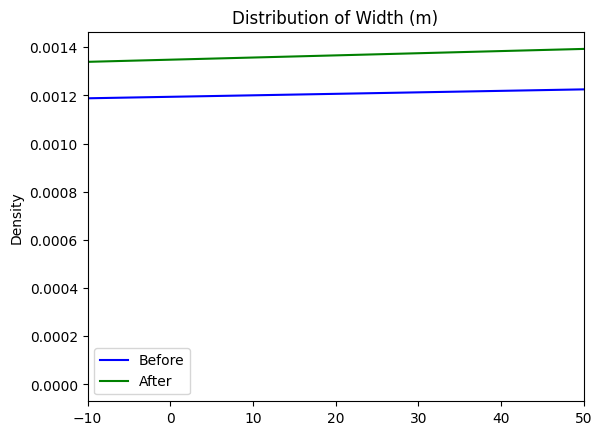

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Width (m)"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Width (m)"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlim(-10, 50) 
ax.set_title("Distribution of Width (m)")
plt.show()

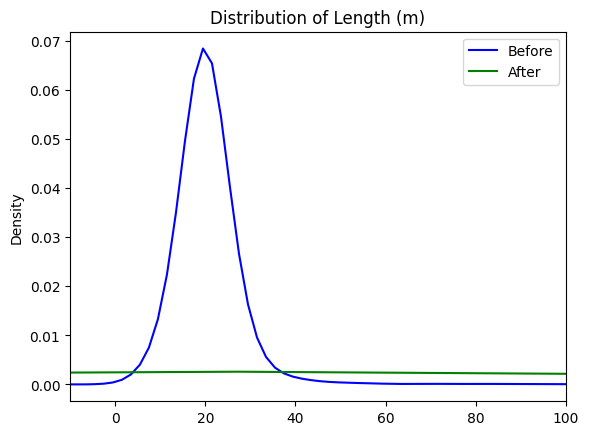

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Length (m)"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Length (m)"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlim(-10, 100) 
ax.set_title("Distribution of Length (m)")
plt.show()

#### For the feature variable *House Direction*, use the random method instead.       

In [8]:
def replace_invalid_house_direction(direction):
    if pd.isna(direction):
        return random.randint(1, 8)
    return direction  

df["House Direction"] = df["House Direction"].apply(replace_invalid_house_direction)

*With this method we can retain the distribution trend of the feature*

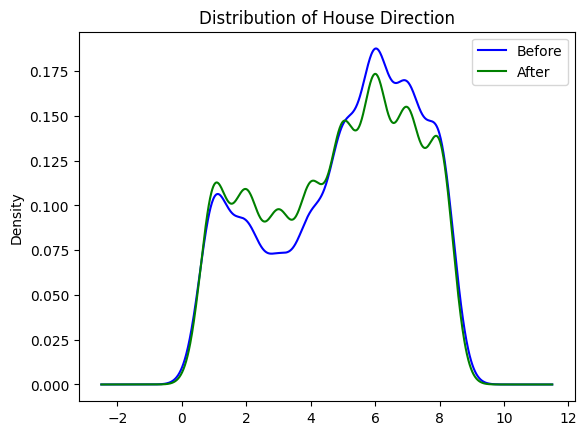

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["House Direction"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["House Direction"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

ax.set_title("Distribution of House Direction")
plt.show()


#### For the *Property Features* variable, if the *land type* is residential land, the default *Property Features* has the value 3 (partly residential land), otherwise it is assumed to be 2 (non-residential land).

In [10]:
df.loc[(df["Land Type"] == 1) & (df["Property Features"].isna()), "Property Features"] = "3"
df.loc[(df["Land Type"] != 1) & (df["Property Features"].isna()), "Property Features"] = "4"
df

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price
0,108.169500,16.065700,100.0,4.0,25.0000,4,6,5.0,2; 4,150000000
1,108.158270,16.053888,102.0,5.0,23.0000,4,6,8.0,3,165000000
2,108.150700,16.058900,150.0,10.0,15.0000,4,6,6.0,2; 3; 4,250000000
3,108.172516,16.028736,100.0,5.0,20.0000,4,5,6.0,4; 2; 3,250000000
4,108.136940,16.077059,100.0,5.0,20.0000,4,5,4.0,4; 2,250000000
...,...,...,...,...,...,...,...,...,...,...
4388,108.191900,16.000677,300.0,15.0,20.0000,1,1,6.0,1; 6,16900000000
4389,108.212360,16.026106,243.0,10.0,24.2999,1,1,3.0,1,18500000000
4390,108.244675,16.080378,180.0,10.0,18.0000,1,1,4.0,3,27000000000
4391,108.246100,16.031725,443.0,5.0,88.6000,1,1,3.0,3,32000000000


*Although the data distribution changes, it is not significant*

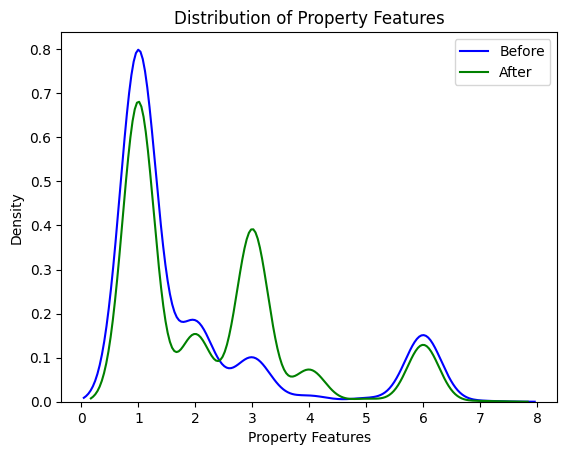

In [11]:
# Convert the 'Property Features' column into a list
df_initial["Property Features"] = df_initial["Property Features"].astype(str).str.split(";")
df["Property Features"] = df["Property Features"].astype(str).str.split(";")

# Expand each value in the array into separate rows
df_initial_exploded = df_initial.explode("Property Features")
df_exploded = df.explode("Property Features")

# Convert values to numeric type
df_initial_exploded["Property Features"] = pd.to_numeric(df_initial_exploded["Property Features"], errors="coerce")
df_exploded["Property Features"] = pd.to_numeric(df_exploded["Property Features"], errors="coerce")

# Plot KDE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(df_initial_exploded["Property Features"].dropna(), ax=ax, color='blue', label="Before")
sns.kdeplot(df_exploded["Property Features"].dropna(), ax=ax, color='green', label="After")

ax.legend()
ax.set_title("Distribution of Property Features")
plt.show()


In [12]:
feature_mapping = {
    1: "Frontage",
    2: "Back Expansion",
    3: "1 Part Residential",
    4: "No Residential",
    5: "Car Alley",
    6: "No Residential",
    7: "All Residential"
}

df["Property Features"] = df["Property Features"].apply(lambda x: [feature_mapping[int(num)] for num in x])
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price
0,108.169500,16.065700,100.0,4.0,25.0,4,6,5.0,"[Back Expansion, No Residential]",150000000
1,108.158270,16.053888,102.0,5.0,23.0,4,6,8.0,[1 Part Residential],165000000
2,108.150700,16.058900,150.0,10.0,15.0,4,6,6.0,"[Back Expansion, 1 Part Residential, No Reside...",250000000
3,108.172516,16.028736,100.0,5.0,20.0,4,5,6.0,"[No Residential, Back Expansion, 1 Part Reside...",250000000
4,108.136940,16.077059,100.0,5.0,20.0,4,5,4.0,"[No Residential, Back Expansion]",250000000


##### Check for lost data

In [13]:
print(df.isnull().sum())

Longitude            0
Latitude             0
Area (m²)            0
Width (m)            0
Length (m)           0
Land Type            0
Legal Status         0
House Direction      0
Property Features    0
Price                0
dtype: int64


### Exceptional data processing (outliers)

In [14]:
df_noOutliers = df.copy()

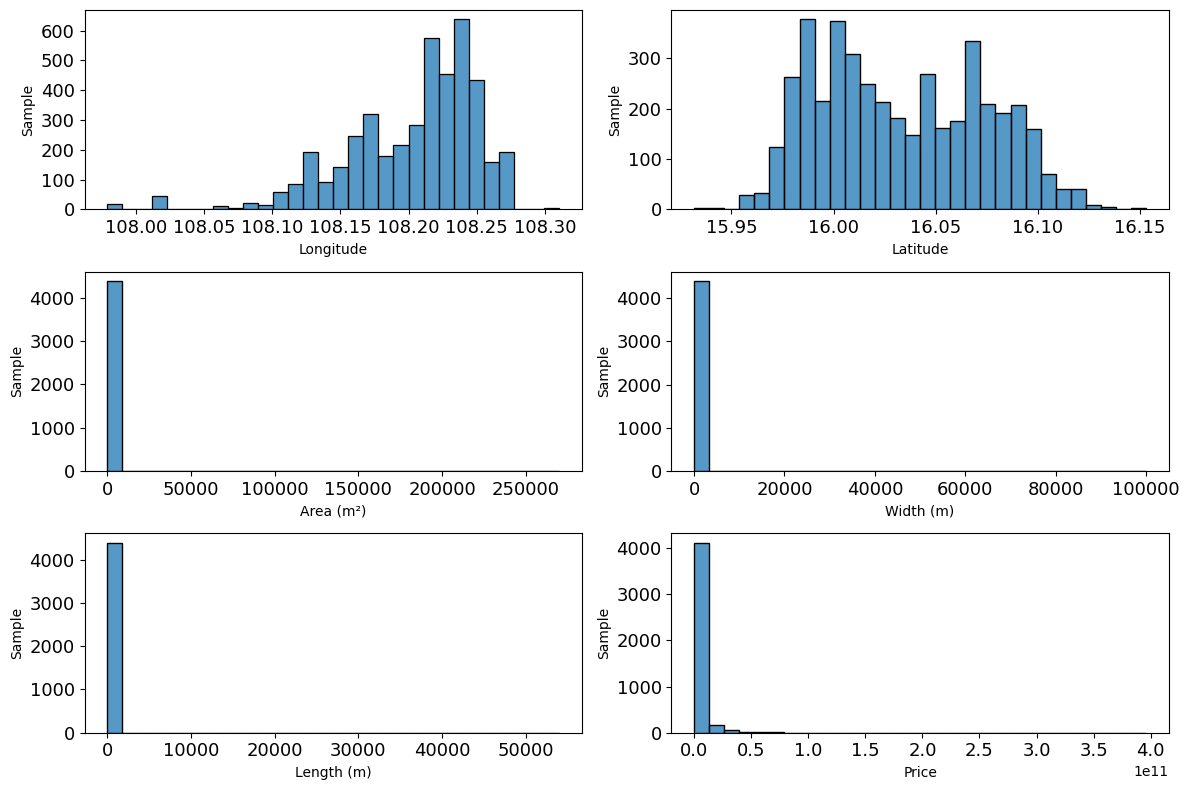

In [15]:
numerical_columns = ["Longitude", "Latitude", "Area (m²)", "Width (m)",	"Length (m)", "Price"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.ylabel('Sample')
    plt.xlabel(col)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()


The data of *Area (m²)*, *Width (m)*, *Length (m)*, *Price* have skewed distribution.                                                            

#### Skewed distribution

In [16]:
cols = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)", "Price"]

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 3 * iqr  
    lower_bound = q1 - 3 * iqr  

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

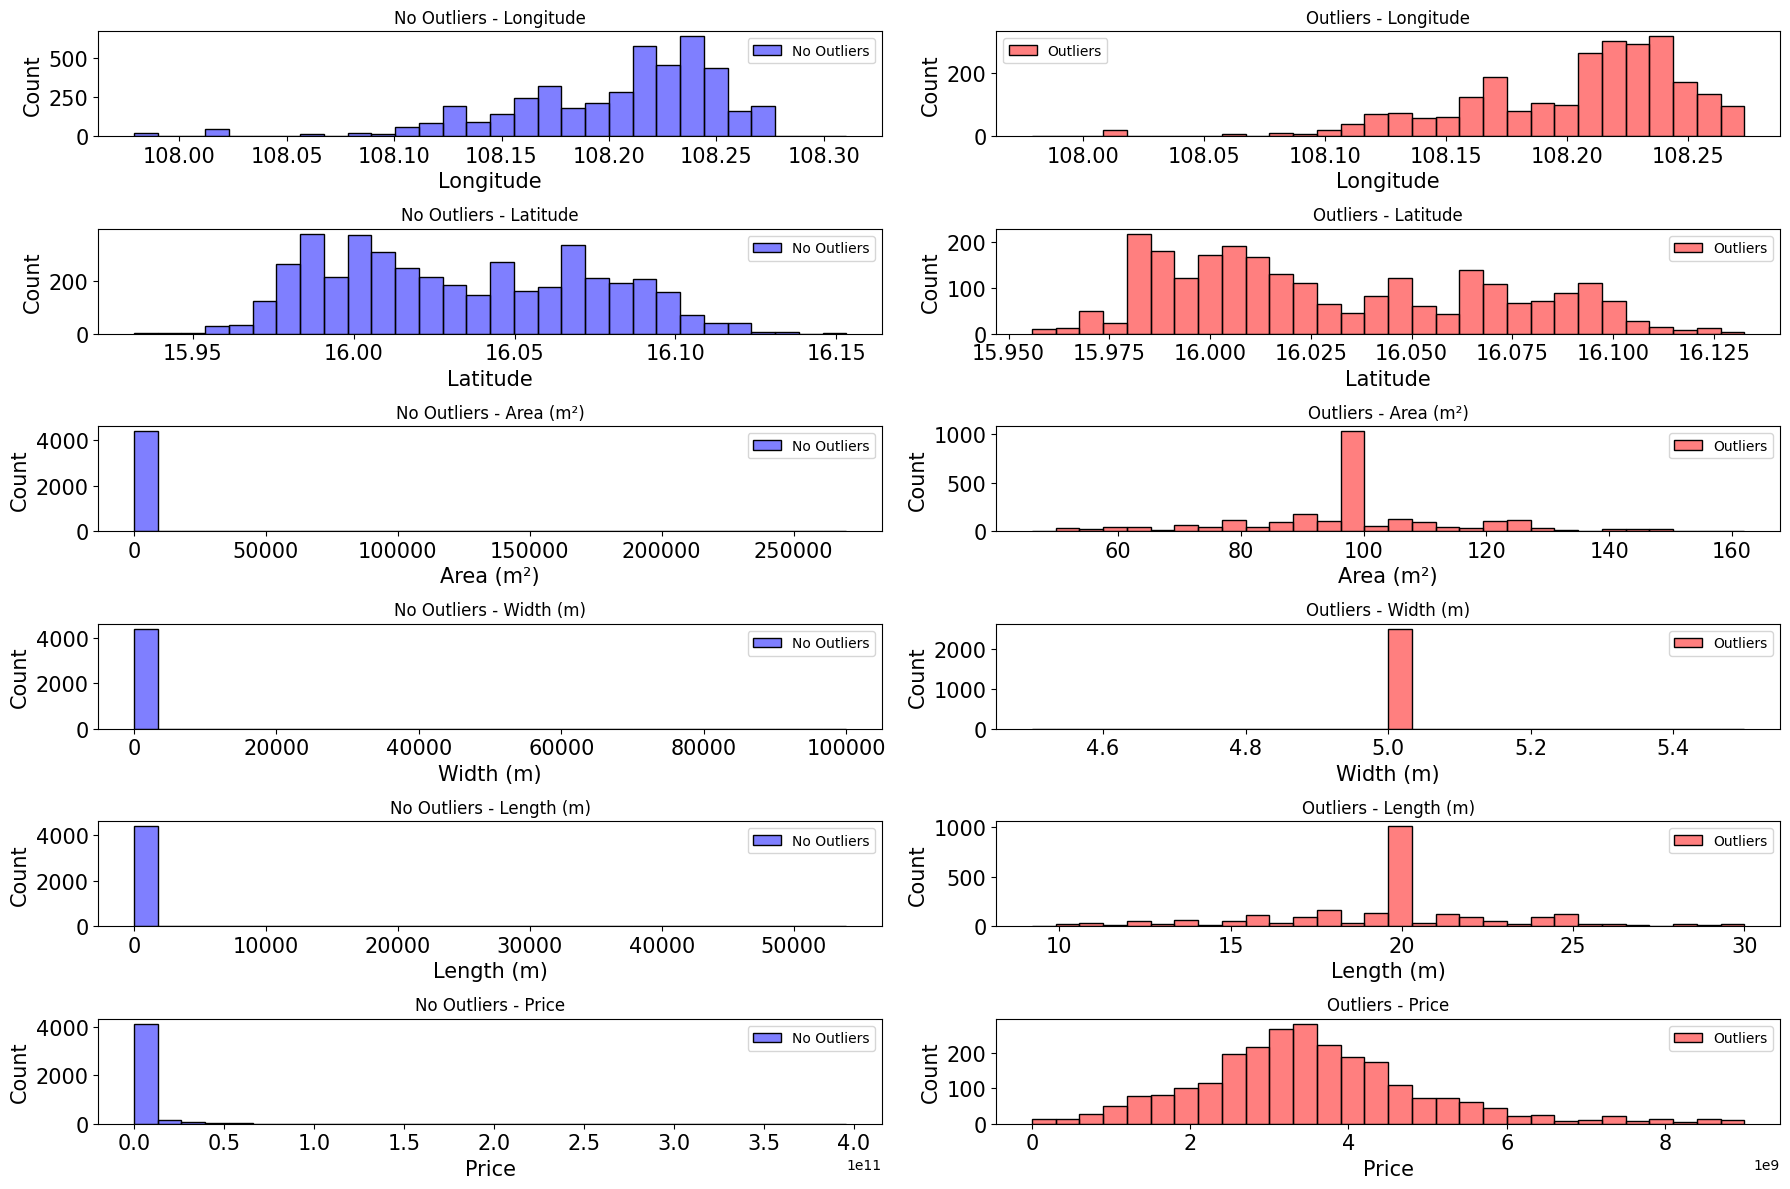

In [17]:
cols = ["Longitude", "Latitude", "Area (m²)",	"Width (m)",	"Length (m)", "Price"]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(6, 2, 2*i-1) 
    sns.histplot(data=df_noOutliers, x=col, bins=30, color='blue', alpha=0.5, label='No Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)   
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('No Outliers - ' + col)
    plt.legend()

    plt.subplot(6, 2, 2*i) 
    sns.histplot(data=df, x=col, bins=30, color='red', alpha=0.5, label='Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('Outliers - ' + col)
    plt.legend()

plt.tight_layout()
plt.show()

In [18]:
df.to_csv('CleanData.csv', index=False)

## Conclusion

#### Clean data reduces risk and errors                                          

<li>Remove blank, incorrect, or noisy values ​​from the data set. This helps ensure that we only work with reliable and accurate information. </li>
<li>When we encounter unusual or outlier values, outlier handling helps minimize the impact of these values ​​on the final results.</li>

#### Increase data consistency and uniformity

<li>Helps to bring the units of measurement into the same range, reducing the difference in proportions between variables. Standardization makes analysis and comparison between variables easier and more accurate. </li>
<li>This is especially important when we want to compare the correlation between variables.</li>